In [1]:
import pandas as pd
import numpy as np

In [2]:
titanic = pd.read_csv('train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Dropping Name and Ticket as they are not impacting outcome

In [4]:
titanic = titanic.drop(columns=['Name','Ticket'])

In [5]:
titanic.count()

PassengerId    891
Survived       891
Pclass         891
Sex            891
Age            714
SibSp          891
Parch          891
Fare           891
Cabin          204
Embarked       889
dtype: int64

### Total survived and who did not survive

In [6]:
print('Survived: '+str(titanic[titanic.Survived==1]["PassengerId"].count()))
print('Did not survive: '+str( titanic[titanic.Survived==0]["PassengerId"].count()))

Survived: 342
Did not survive: 549


## Survival chance based on boarding point

In [7]:
print('Total from Southampton: '+str(titanic[titanic['Embarked']=='S']['PassengerId'].count()))
print('Survived from Southampton: '+str(titanic[(titanic['Embarked']=='S') & (titanic['Survived']==1)]['PassengerId'].count()))
print('Did not survived from Southampton: '+str(titanic[(titanic['Embarked']=='S') & (titanic['Survived']==0)]['PassengerId'].count()))

Total from Southampton: 644
Survived from Southampton: 217
Did not survived from Southampton: 427


In [8]:
print('Total from Cherbourg: '+str(titanic[titanic['Embarked']=='C']['PassengerId'].count()))
print('Survived from Cherbourg: '+str(titanic[(titanic['Embarked']=='C') & (titanic['Survived']==1)]['PassengerId'].count()))
print('Did not survive from Cherbourg: '+str(titanic[(titanic['Embarked']=='C') & (titanic['Survived']==0)]['PassengerId'].count()))

Total from Cherbourg: 168
Survived from Cherbourg: 93
Did not survive from Cherbourg: 75


In [9]:
print('Total from Queenstown: '+str(titanic[titanic['Embarked']=='Q']['PassengerId'].count()))
print('Survived from Queenstown: '+str(titanic[(titanic['Embarked']=='Q') & (titanic['Survived']==1)]['PassengerId'].count()))
print('Did not survive from Queenstown: '+str(titanic[(titanic['Embarked']=='Q') & (titanic['Survived']==0)]['PassengerId'].count()))

Total from Queenstown: 77
Survived from Queenstown: 30
Did not survive from Queenstown: 47


## Visualizing Age Distribution of Passengers

C:\Users\darsh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\darsh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


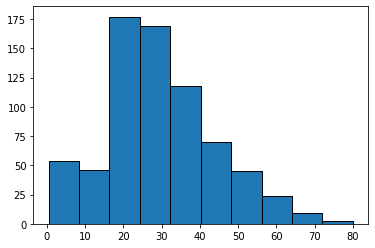

(array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]))

In [12]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(titanic.Age, edgecolor='black')
plt.show()

#display bin boundaries and frequency per bin 
bins, n

## Survival Chance based on Gender

In [13]:
print('Male Total: '+str(titanic[titanic['Sex']=='male']['PassengerId'].count()))
print('Male Survived: ' + str(titanic[(titanic['Sex']=='male') & (titanic['Survived']==1)]['PassengerId'].count()))
print('Male Died: '+str(titanic[(titanic['Sex']=='male') & (titanic['Survived']==0)]['PassengerId'].count()))

Male Total: 577
Male Survived: 109
Male Died: 468


In [14]:
print('Female Total: '+str(titanic[titanic['Sex']=='female']['PassengerId'].count()))
print('Female Survived: ' + str(titanic[(titanic['Sex']=='female') & (titanic['Survived']==1)]['PassengerId'].count()))
print('Female Died: '+str(titanic[(titanic['Sex']=='female') & (titanic['Survived']==0)]['PassengerId'].count()))

Female Total: 314
Female Survived: 233
Female Died: 81


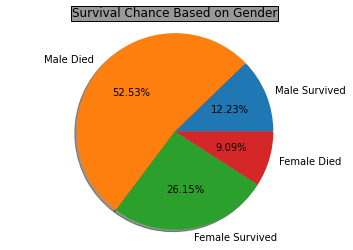

In [15]:
labels="Male Survived","Male Died","Female Survived","Female Died"                #assigning the labels.
sizes=[109, 468, 233, 81]   
fig1, ax1=plt.subplots()   
explode=(0,0,0,0)                                       #showing forward position as cutting piece from the pie.
ax1.pie(sizes,labels=labels,explode=explode,autopct="%2.2f%%", shadow =True) #
ax1.axis("equal")
plt.title("Survival Chance Based on Gender",bbox={'facecolor':"0.6","pad":1})    #giving title, color and padding.
plt.show()

## Should missing cabin values be imputed and filled?

print('Total filled Cabin Values: '+str(titanic.Cabin.count()))
print('Unique total cabin values: '+str(titanic.Cabin.nunique()))

In [16]:
print('Survived passenger cabin values: '+str(titanic[(titanic.Survived==1) & titanic.Cabin.notnull()]['PassengerId'].count()))
print('Not survived passenger cabin values: '+str(titanic[(titanic.Survived==0) & titanic.Cabin.notnull()]['PassengerId'].count()))

Survived passenger cabin values: 136
Not survived passenger cabin values: 68


### More than 66.66% of the total present values are unique and more than 70% are missing. Hence, cabin column is not considered in the model.

In [17]:
titanic = titanic.drop(columns='Cabin')

### Survival Rate Based on Number of Siblings and Spouse

In [18]:
print('Passengers with one SibSp : '+str(titanic[(titanic['SibSp']==1)]['PassengerId'].count()))
print('Suvived passengers: '+str(titanic[(titanic['SibSp']==1) & (titanic['Survived']==1)]['PassengerId'].count()))
print('Did not survive: '+str(titanic[(titanic['SibSp']==1) & (titanic['Survived']==0)]['PassengerId'].count()))

Passengers with one SibSp : 209
Suvived passengers: 112
Did not survive: 97


In [19]:
print('Passengers with no SibSp : '+str(titanic[(titanic['SibSp']==0)]['PassengerId'].count()))
print('Suvived passengers: '+str(titanic[(titanic['SibSp']==0) & (titanic['Survived']==1)]['PassengerId'].count()))
print('Did not survive: '+str(titanic[(titanic['SibSp']==0) & (titanic['Survived']==0)]['PassengerId'].count()))

Passengers with no SibSp : 608
Suvived passengers: 210
Did not survive: 398


In [20]:
titanic['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [21]:
print(titanic[titanic['Survived']==1].groupby('SibSp')['PassengerId'].count())
print(titanic[titanic['Survived']==0].groupby('SibSp')['PassengerId'].count())

SibSp
0    210
1    112
2     13
3      4
4      3
Name: PassengerId, dtype: int64
SibSp
0    398
1     97
2     15
3     12
4     15
5      5
8      7
Name: PassengerId, dtype: int64


## Based on Gender and Age
### Female and less than 18

In [22]:
titanic[(titanic.Sex=='female') & (titanic.Age<18)].groupby('Survived')['PassengerId'].count()

Survived
0    17
1    38
Name: PassengerId, dtype: int64

### Male and less than 18

In [23]:
titanic[(titanic.Sex=='male') & (titanic.Age<18)].groupby('Survived')['PassengerId'].count()

Survived
0    35
1    23
Name: PassengerId, dtype: int64

## Checking survival rate based on classes

In [24]:
print('Total passengers in 1st class: ' + str(titanic[titanic.Pclass==1]['PassengerId'].count()))
print('Passengers who survived in 1st class: '+str(titanic[(titanic.Pclass==1) & (titanic.Survived==1)]['PassengerId'].count()))
print('Passengers who did not survive in 1st class: '+str(titanic[(titanic.Pclass==1) & (titanic.Survived==0)]['PassengerId'].count()))

Total passengers in 1st class: 216
Passengers who survived in 1st class: 136
Passengers who did not survive in 1st class: 80


In [25]:
print('Total passengers in 2nd class: ' + str(titanic[titanic.Pclass==2]['PassengerId'].count()))
print('Passengers who survived in 2nd class: '+str(titanic[(titanic.Pclass==2) & (titanic.Survived==1)]['PassengerId'].count()))
print('Passengers who did not survive in 2nd class: '+str(titanic[(titanic.Pclass==2) & (titanic.Survived==0)]['PassengerId'].count()))

Total passengers in 2nd class: 184
Passengers who survived in 2nd class: 87
Passengers who did not survive in 2nd class: 97


In [26]:
print('Total passengers in 3rd class: ' + str(titanic[titanic.Pclass==3]['PassengerId'].count()))
print('Passengers who survived in 3rd class: '+str(titanic[(titanic.Pclass==3) & (titanic.Survived==1)]['PassengerId'].count()))
print('Passengers who did not survive in 3rd class: '+str(titanic[(titanic.Pclass==3) & (titanic.Survived==0)]['PassengerId'].count()))

Total passengers in 3rd class: 491
Passengers who survived in 3rd class: 119
Passengers who did not survive in 3rd class: 372


## Checking survival rate for Parent/Children

In [27]:
print(titanic[titanic.Parch==0]['PassengerId'].count())
print(titanic[titanic.Parch>0]['PassengerId'].count())

678
213


In [28]:
print(titanic[(titanic.Parch==0) & (titanic.Survived==1)]['PassengerId'].count())
print(titanic[(titanic.Parch==0) & (titanic.Survived==0)]['PassengerId'].count())

233
445


In [29]:
print(titanic[(titanic.Parch>0) & (titanic.Survived==1)]['PassengerId'].count())
print(titanic[(titanic.Parch>0) & (titanic.Survived==0)]['PassengerId'].count())

109
104


## Parent/Children and Gender 

In [30]:
print(titanic[((titanic.Parch>0) & (titanic.Survived==1)) & (titanic.Sex=='female')]['PassengerId'].count())
print(titanic[((titanic.Parch>0) & (titanic.Survived==0)) & (titanic.Sex=='female')]['PassengerId'].count())

80
40


In [31]:
print(titanic[((titanic.Parch>0) & (titanic.Survived==1)) & ((titanic.Sex=='female') & (titanic.Age<14))]['PassengerId'].count())
print(titanic[((titanic.Parch>0) & (titanic.Survived==0)) & ((titanic.Sex=='female') & (titanic.Age<14))]['PassengerId'].count())

19
13


# Checking Dependency of Fare rates on Pclass
## Is fare depedent on Passenger class?

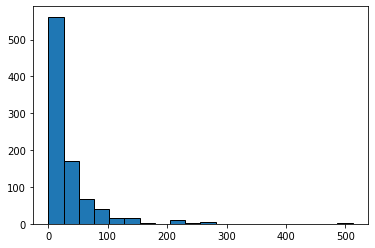

In [32]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(titanic.Fare, bins = 20, edgecolor='black')
plt.show()

In [33]:
titanic[titanic.Pclass==1]['Fare'].describe()

count    216.000000
mean      84.154687
std       78.380373
min        0.000000
25%       30.923950
50%       60.287500
75%       93.500000
max      512.329200
Name: Fare, dtype: float64

In [34]:
titanic[titanic.Pclass==2]['Fare'].describe()

count    184.000000
mean      20.662183
std       13.417399
min        0.000000
25%       13.000000
50%       14.250000
75%       26.000000
max       73.500000
Name: Fare, dtype: float64

In [35]:
titanic[titanic.Pclass==3]['Fare'].describe()

count    491.000000
mean      13.675550
std       11.778142
min        0.000000
25%        7.750000
50%        8.050000
75%       15.500000
max       69.550000
Name: Fare, dtype: float64

## Fare is dependent on Pclass and hence this feature will bring biased in the KNN model. Thus, it is dropped from the model.

# Data Cleaning

In [36]:
titanic = titanic.drop(columns='Fare')

### Male and Female are converted to zero and 1

In [37]:
titanic['Sex'].replace('male',0,inplace=True)

In [38]:
titanic['Sex'].replace('female',1,inplace=True)

In [39]:
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,0,22.0,1,0,S
1,2,1,1,1,38.0,1,0,C
2,3,1,3,1,26.0,0,0,S
3,4,1,1,1,35.0,1,0,S
4,5,0,3,0,35.0,0,0,S
...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,S
887,888,1,1,1,19.0,0,0,S
888,889,0,3,1,NaN,1,2,S
889,890,1,1,0,26.0,0,0,C


### Point of Embarkment is changed to 0, 1, and 2.

In [40]:
titanic['Embarked'].replace('S',0,inplace=True)
titanic['Embarked'].replace('C',1,inplace=True)
titanic['Embarked'].replace('Q',2,inplace=True)

### Filling two missing values with Southampton as maximum passengers are from Southampton. 

In [41]:
titanic['Embarked'].fillna(0,inplace=True)

### Imputations of the missing values of Age

In [42]:
age_mean = round(titanic['Age'].mean())
titanic['Age'].fillna(age_mean,inplace=True)

In [43]:
test = pd.read_csv('test.csv')

In [44]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Feature removal and data cleaning for the test dataset

In [45]:
test = test[['Pclass','Sex','Age','SibSp','Parch','Embarked']]
test['Sex'].replace('male',0,inplace=True)
test['Sex'].replace('female',1,inplace=True)
test['Embarked'].replace('S',0,inplace=True)
test['Embarked'].replace('C',1,inplace=True)
test['Embarked'].replace('Q',2,inplace=True)
test['Embarked'].fillna(0,inplace=True)
test['Age'].fillna(age_mean,inplace=True)

In [46]:
X_test = test.values

In [47]:
X_test

array([[ 3. ,  0. , 34.5,  0. ,  0. ,  2. ],
       [ 3. ,  1. , 47. ,  1. ,  0. ,  0. ],
       [ 2. ,  0. , 62. ,  0. ,  0. ,  2. ],
       ...,
       [ 3. ,  0. , 38.5,  0. ,  0. ,  0. ],
       [ 3. ,  0. , 30. ,  0. ,  0. ,  0. ],
       [ 3. ,  0. , 30. ,  1. ,  1. ,  1. ]])

# Modelling

In [48]:
X = titanic[['Pclass','Sex','Age','SibSp','Parch','Embarked']]

In [49]:
y = titanic[['Survived']]

In [50]:
X_train = X.values
X_train

array([[ 3.,  0., 22.,  1.,  0.,  0.],
       [ 1.,  1., 38.,  1.,  0.,  1.],
       [ 3.,  1., 26.,  0.,  0.,  0.],
       ...,
       [ 3.,  1., 30.,  1.,  2.,  0.],
       [ 1.,  0., 26.,  0.,  0.,  1.],
       [ 3.,  0., 32.,  0.,  0.,  2.]])

In [51]:
y_train = [i[0] for i in y.values]

## KNearest Neighbor Model

In [52]:
class KNN:
    
    """ For the titanic dataset, the best prediction for k is seen as 3.
    Keeping default value of k as 3. To enable calculation with all distances, p is also taken.
    For this dataset, we will use p=2 as default which becomes Euclidean distance. """
    
    """Value of p can be changed to use Minkowski Distance. """
    
    def __init__(self, k=3, p=2):
        self.k = k
        self.p = p

    def fit(self, X_train, y_train):
        """ This function is initialized to take input of training features and training labels"""
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        
        """ This function is initialized to predict the values for test dataset of titanic."""
        
        minkowski_matrix = self.calculate_minkowski_distance(X_test)
        return self.final_classified_output(minkowski_matrix)

    def calculate_minkowski_distance(self, X_test):
        
        """ Formula of the Minkowski distance is kept in this function to calculate distances 
        between trained and test data."""
        
        col_test_length, col_test_width = X_test.shape
        
        col_train_length, col_train_width = self.X_train.shape
        
        # First create a matrix with number of test rows as rows and number of train rows as columns  
        
        minkowski_matrix = np.zeros((col_test_length, col_train_length))

        # Calculate distance for each row value in test data with each value in training data.
        for i in range(col_test_length):
            for j in range(col_train_length):
                # Distance calculation
                minkowski_matrix[i, j] = (np.sum(abs(X_test[i, :] - self.X_train[j, :]) ** self.p))**(1/self.p)
        return minkowski_matrix

    def final_classified_output(self, minkowski_matrix):
        #print(minkowski_matrix) #Debugging
        col_test_length, col_test_width = minkowski_matrix.shape
        classify_array = np.zeros(col_test_length)

        for i in range(col_test_length):
            # Finding the closest points indexes for ith array.
            index_sorting = np.argsort(minkowski_matrix[i, :])
            
            # From the sorted array, fetch the value for ith array's k closest points.
            nearbyclasses = np.array(self.y_train)[index_sorting[:self.k]]
            
            # Find class which is seen highest in the k nearest values and then fetch it using argmax. 
            classify_array[i] = np.argmax(np.bincount(nearbyclasses))

        return classify_array

## Splitting the data for validation and checking accuracy before implementing on test dataset.

In [56]:
from sklearn.model_selection import train_test_split
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, random_state=20)
validating = KNN(k=3,p=2)
validating.fit(X_train_val, y_train_val)
y_pred_val = validating.predict(X_test_val)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_val, y_pred_val))

0.8071748878923767


#### This shows that KNN model could is giving a good accuracy.

## Training on whole training dataset to use on test dataset.

In [57]:
mink = KNN(k=3,p=2)
mink.fit(X_train, y_train)

## Predicting for test dataset for KNN

In [58]:
y_pred = mink.predict(X_test)

## Random Forest Classifier Training and Validating

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, random_state=20)
validating_rnd_clf3 = RandomForestClassifier(max_depth=4,n_estimators=50, max_leaf_nodes=8, random_state=50)
validating_rnd_clf3.fit(X_train_val, y_train_val)
y_pred_val = validating_rnd_clf3.predict(X_test_val)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_val, y_pred_val))

0.8251121076233184


#### This shows that Random Forest is also giving good accuracy
## Training on whole data and implementing on test dataset

In [60]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

rnd_clf3 = RandomForestClassifier(max_depth=4,n_estimators=50, max_leaf_nodes=8, random_state=50)
rnd_clf3.fit(X_train, y_train)

y_pred_rf3 = rnd_clf3.predict(X_test)

## Gaussian Naive Bayes Classifier training and validating

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, random_state=20)
gnb = GaussianNB()
y_pred_val = gnb.fit(X_train_val, y_train_val).predict(X_test_val)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_val, y_pred_val))

0.8161434977578476


#### This shows that Gaussian Naive Bayes is also giving accuracy which is nearby to KNN and Random Forest 

## Training on whole data for Gaussian Naive Bayes classifier and implementing on test dataset

In [63]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
gnb = GaussianNB()
y_pred_gaussian = gnb.fit(X_train, y_train).predict(X_test)

## Create a Dataframe to put values of all models

In [64]:
All = pd.DataFrame(y_pred, columns = ['KNN']) 
All['RandomForest'] = y_pred_rf3
All['Gaussian'] = y_pred_gaussian
All = All.astype('int64')
a = All.values


## Taking the class which is the output in atleast two models.

## Final Outcome based on three models in b

In [65]:
b=[]
for i in a:
    b.append(np.argmax(np.bincount(i)))

In [66]:
pd.DataFrame(b).to_csv('Final_Prediction.csv')